# Image Processing with Keras in Python



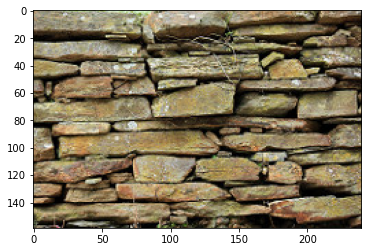

In [1]:
import matplotlib.pyplot as plt

data = plt.imread('/content/drive/MyDrive/datacamp/cnn/bricks.png')
plt.imshow(data)
plt.show()

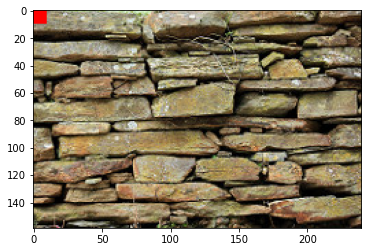

In [2]:
#red channel
data[:10,:10,0] = 1

#green channel
data[:10,:10,1] = 0

#blue channel
data[:10,:10,2] = 0

plt.imshow(data)
plt.show()

In [3]:
import numpy as np

labels = np.array(['shoe', 'shirt', 'shoe', 'shirt', 'dress', 'dress', 'dress'])

n_categories = 3

categories = np.array(['shirt','dress','shoe'])

ohe_labels = np.zeros((len(labels), n_categories))

for ii in range(len(labels)):
    jj = np.where(categories == labels[ii])
    ohe_labels[ii,jj] = 1

In [4]:
ohe_labels

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [5]:
predictions = np.array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [6]:
test_labels = np.array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [7]:
number_correct = (predictions * test_labels).sum()
proportion_correct = number_correct / len(test_labels)
print(proportion_correct)

0.75


In [8]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [9]:
model.compile(optimizer='adam', 
           loss='categorical_crossentropy', 
           metrics=['accuracy'])

In [12]:
arr = np.load('/content/drive/MyDrive/datacamp/cnn/fashion.npz',allow_pickle=True)['arr_0']

In [14]:
test_data = arr.tolist()['test_data']
test_labels = arr.tolist()['test_labels']

train_data = arr.tolist()['train_data']
train_labels = arr.tolist()['train_labels']

In [15]:
train_data = train_data.reshape(50, 784)
model.fit(train_data, train_labels, validation_split=0.2, epochs=3)

Epoch 1/3
2/2 [==============================] - 1s 405ms/step - loss: 1.1035 - accuracy: 0.2292 - val_loss: 0.8239 - val_accuracy: 0.8000
Epoch 2/3
2/2 [==============================] - 0s 43ms/step - loss: 0.8819 - accuracy: 0.5542 - val_loss: 0.7194 - val_accuracy: 0.9000
Epoch 3/3
2/2 [==============================] - 0s 40ms/step - loss: 0.7834 - accuracy: 0.8479 - val_loss: 0.6025 - val_accuracy: 1.0000


In [16]:
test_data = test_data.reshape(10, 784)
model.evaluate(test_data, test_labels)

1/1 [==============================] - 0s 18ms/step - loss: 0.7752 - accuracy: 0.9000


[0.7751672863960266, 0.8999999761581421]

In [17]:
model.metrics_names

['loss', 'accuracy']

In [21]:
(img_cols, img_rows) = 28,28

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add(Conv2D(10, kernel_size=3, activation='relu', 
               input_shape=(img_rows, img_cols, 1)))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [23]:
test_data = arr.tolist()['test_data']
test_labels = arr.tolist()['test_labels']

train_data = arr.tolist()['train_data']
train_labels = arr.tolist()['train_labels']

In [24]:
train_data.shape

(50, 28, 28, 1)

In [25]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(train_data, train_labels, 
          validation_split=.2, 
          epochs=3, batch_size=10)

Epoch 1/3
4/4 [==============================] - 1s 58ms/step - loss: 1.0165 - accuracy: 0.4633 - val_loss: 0.4858 - val_accuracy: 0.9000
Epoch 2/3
4/4 [==============================] - 0s 16ms/step - loss: 0.5136 - accuracy: 0.8933 - val_loss: 0.2837 - val_accuracy: 1.0000
Epoch 3/3
4/4 [==============================] - 0s 14ms/step - loss: 0.3106 - accuracy: 0.9067 - val_loss: 0.2395 - val_accuracy: 1.0000


In [26]:
model.evaluate(test_data,test_labels, batch_size=10) 

1/1 [==============================] - 0s 18ms/step - loss: 0.2865 - accuracy: 0.9000


[0.28651192784309387, 0.8999999761581421]

In [27]:
model = Sequential()

# add padding 
model.add(Conv2D(10, kernel_size=3, activation='relu', 
                 input_shape=(img_rows, img_cols, 1), 
                 padding='same'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [28]:
model = Sequential()
# add stirdes
model.add(Conv2D(10, kernel_size=3, activation='relu', 
              input_shape=(img_rows, img_cols, 1), 
              strides=2))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 13, 13, 10)        100       
_________________________________________________________________
flatten_2 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 5073      
Total params: 5,173
Trainable params: 5,173
Non-trainable params: 0
_________________________________________________________________


In [30]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
model = Sequential()
model.add(Conv2D(15, activation='relu', kernel_size=2, input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(5, activation='relu', kernel_size=2))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [31]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(train_data, train_labels, 
          validation_split=0.2, 
          epochs=3, batch_size=10)
model.evaluate(test_data, test_labels, batch_size=10)

Epoch 1/3
4/4 [==============================] - 1s 81ms/step - loss: 1.0664 - accuracy: 0.5400 - val_loss: 0.9241 - val_accuracy: 0.8000
Epoch 2/3
4/4 [==============================] - 0s 24ms/step - loss: 0.9026 - accuracy: 0.8267 - val_loss: 0.6954 - val_accuracy: 1.0000
Epoch 3/3
1/1 [==============================] - 0s 22ms/step - loss: 0.7528 - accuracy: 0.9000


[0.7528327703475952, 0.8999999761581421]

In [32]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 27, 27, 15)        75        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 5)         305       
_________________________________________________________________
flatten_3 (Flatten)          (None, 3380)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 10143     
Total params: 10,523
Trainable params: 10,523
Non-trainable params: 0
_________________________________________________________________


In [33]:
model = Sequential()
model.add(Conv2D(10, activation='relu', kernel_size=3, input_shape=(img_rows, img_cols, 1), padding='same'))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 10)        100       
_________________________________________________________________
flatten_4 (Flatten)          (None, 7840)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 15682     
Total params: 15,782
Trainable params: 15,782
Non-trainable params: 0
_________________________________________________________________


In [34]:
model = Sequential()
model.add(Conv2D(10, kernel_size=2, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(10, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 27, 27, 10)        50        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 10)        410       
_________________________________________________________________
flatten_5 (Flatten)          (None, 6760)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 20283     
Total params: 20,743
Trainable params: 20,743
Non-trainable params: 0
_________________________________________________________________


In [36]:
from keras.layers import MaxPool2D

model = Sequential()
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))
model.add(MaxPool2D(2))
model.add(Conv2D(5,2,activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 27, 27, 15)        75        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 15)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 5)         305       
_________________________________________________________________
flatten_6 (Flatten)          (None, 720)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 2163      
Total params: 2,543
Trainable params: 2,543
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data, train_labels, epochs=3, batch_size=10, validation_split=.2)
model.evaluate(test_data, test_labels, batch_size=10)

Epoch 1/3
4/4 [==============================] - 1s 76ms/step - loss: 1.1405 - accuracy: 0.2600 - val_loss: 1.0550 - val_accuracy: 0.6000
Epoch 2/3
4/4 [==============================] - 0s 22ms/step - loss: 1.1210 - accuracy: 0.2967 - val_loss: 1.0353 - val_accuracy: 0.7000
Epoch 3/3
1/1 [==============================] - 0s 18ms/step - loss: 1.0440 - accuracy: 0.5000


[1.043973684310913, 0.5]

In [38]:
import matplotlib.pyplot as plt

model = Sequential()
model.add(Conv2D(4, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))
model.add(MaxPool2D(2))
model.add(Conv2D(8,kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 27, 27, 4)         20        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 4)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 8)         296       
_________________________________________________________________
flatten_7 (Flatten)          (None, 968)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 2907      
Total params: 3,223
Trainable params: 3,223
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
training = model.fit(train_data, train_labels, validation_split=.2, epochs=3, batch_size=10)

Epoch 1/3
4/4 [==============================] - 1s 67ms/step - loss: 1.0659 - accuracy: 0.4700 - val_loss: 1.0147 - val_accuracy: 0.8000
Epoch 2/3
4/4 [==============================] - 0s 17ms/step - loss: 1.0278 - accuracy: 0.6367 - val_loss: 0.9689 - val_accuracy: 0.8000
Epoch 3/3
4/4 [==============================] - 0s 79ms/step - loss: 0.9797 - accuracy: 0.7267 - val_loss: 0.9172 - val_accuracy: 0.9000


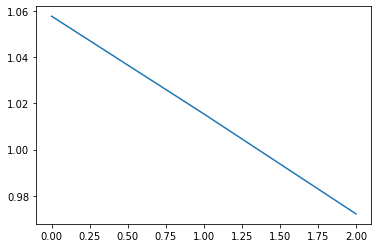

In [40]:
history = training.history
plt.plot(history['loss'])

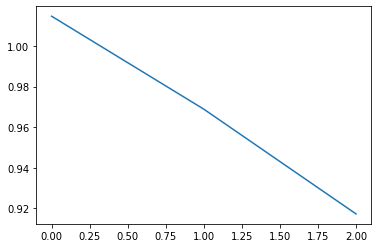

In [41]:
plt.plot(history['val_loss'])

In [42]:
model = Sequential()
model.add(Conv2D(5, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(15,kernel_size=2,activation='relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 27, 27, 5)         25        
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 26, 26, 15)        315       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 15)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 2535)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 7608      
Total params: 7,948
Trainable params: 7,948
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.load_weights('/content/drive/MyDrive/datacamp/cnn/weights.hdf5')
model.predict(test_data[:3])

array([[0.09926845, 0.09344569, 0.80728585],
       [0.03939046, 0.043042  , 0.91756755],
       [0.23671192, 0.7098689 , 0.05341914]], dtype=float32)

In [45]:
from keras.layers import Dropout

model = Sequential()
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))
model.add(Dropout(.2))
model.add(Conv2D(5, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 27, 27, 15)        75        
_________________________________________________________________
dropout (Dropout)            (None, 27, 27, 15)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 26, 26, 5)         305       
_________________________________________________________________
flatten_9 (Flatten)          (None, 3380)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 10143     
Total params: 10,523
Trainable params: 10,523
Non-trainable params: 0
_________________________________________________________________


In [46]:
from keras.layers import BatchNormalization
model = Sequential()
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))
model.add(BatchNormalization())
model.add(Conv2D(5, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 27, 27, 15)        75        
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 15)        60        
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 26, 26, 5)         305       
_________________________________________________________________
flatten_10 (Flatten)         (None, 3380)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 10143     
Total params: 10,583
Trainable params: 10,553
Non-trainable params: 30
_________________________________________________________________


In [47]:
model = Sequential()
model.add(Conv2D(5, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(15,kernel_size=2,activation='relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 27, 27, 5)         25        
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 26, 26, 15)        315       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 15)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 2535)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 7608      
Total params: 7,948
Trainable params: 7,948
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.load_weights('/content/drive/MyDrive/datacamp/cnn/weights.hdf5')
c1 = model.layers[0]
weights1 = c1.get_weights()
kernel = weights1[0][...,0, 0]
print(kernel)

[[ 0.03504268  0.4328133 ]
 [-0.17416623  0.4680562 ]]


In [50]:
def convolution(image, kernel):
    kernel = kernel - kernel.mean()
    result = np.zeros(image.shape)
    for ii in range(image.shape[0]-2):
        for jj in range(image.shape[1]-2):
            result[ii, jj] = np.sum(image[ii:ii+2, jj:jj+2] * kernel)
    return result

In [51]:
import inspect
lines = inspect.getsource(convolution)
print(lines)

def convolution(image, kernel):
    kernel = kernel - kernel.mean()
    result = np.zeros(image.shape)
    for ii in range(image.shape[0]-2):
        for jj in range(image.shape[1]-2):
            result[ii, jj] = np.sum(image[ii:ii+2, jj:jj+2] * kernel)
    return result



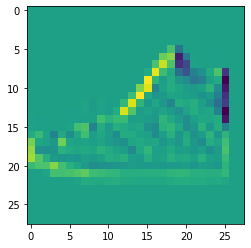

In [52]:
import matplotlib.pyplot as plt
out = convolution(test_data[3, :, :, 0], kernel)
plt.imshow(out)
plt.show()

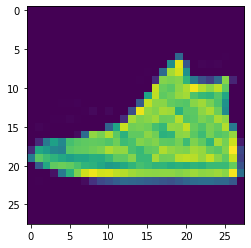

In [53]:
plt.imshow(test_data[3, :, :, 0])

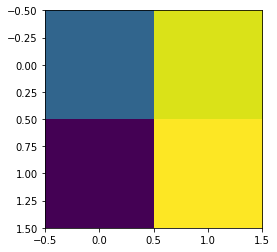

In [54]:
plt.imshow(kernel)